In [1]:
# coastwatch_delta.py
# Program to download CoastWatch delta-SST and
#  DINEOF-analyzed fields from oceanus and plot alongside
#  last JPL-OSCAR surface current fields from oceanus.
#  Also computes estimated turbulent heat flux difference
#  fields from Ma et al (2016) and Bishop et al (2017).
#
# Bishop, S. P., R. J. Small, F. O. Bryan, and R. A. Tomas (2017), 
#  Scale Dependence of Midlatitude Air–Sea Interaction, J Climate,
#  30(20), 8207–8221, doi:10.1175/JCLI-D-17-0159.1.
#
# Ma, X. et al. (2016), Western boundary currents regulated by
#  interaction between ocean eddies and the atmosphere, Nature
#  Publishing Group, 535(7613), 533–537, doi:10.1038/nature18640.
#
# Joseph B. Zambon
# 23 August 2018

import sys
print(sys.version)

3.5.5 |Anaconda, Inc.| (default, May 13 2018, 21:12:35) 
[GCC 7.2.0]


In [2]:
# ! conda install -y numpy
# ! conda install -y qt=5 pyqt=5
# ! conda install -y -c conda-forge pydap 
# ! conda install -y -c conda-forge cmocean
# ! conda install -y matplotlib
# ! conda install -y -c anaconda basemap
# ! conda install -y -c conda-forge basemap-data-hires=1.0.8.dev0

In [3]:
#Dependencies
import numpy as np
from pydap.client import open_url
import cmocean
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import datetime

# For inline plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Define dates
yyyy1=2018;  yyyy2=2018;
mm1=1;         mm2=1;
dd1=11;        dd2=20;

anomaly = [40,60]  #defined from Bishop et al (2017) and Ma et al (2016)

sst_range = [4,26,4]     #min, max, colorbar step
dsst_range = [-2,2,1]    #min, max, colorbar step
anomaly_range = [-200,200,100]  #min, max, colorbar step

# Define Coordinates
#coords = [43, 30, -65, -82]      #  US East Coast (N'rn FL -> S'rn NH)
coords = [38, 32, -72, -80]     # Carolinas

In [5]:
# Link OPeNDAP datasets
coastwatch_sst_url   = 'http://oceanus.meas.ncsu.edu:8080/thredds/dodsC/carolinas/coastwatch/sst.nc'
coastwatch_sst = open_url(coastwatch_sst_url)
dineof_sst_url   = 'http://oceanus.meas.ncsu.edu:8080/thredds/dodsC/carolinas/coastwatch/dineof_sst.nc'
dineof_sst = open_url(dineof_sst_url)
oscar_sfc_curr_url = 'http://oceanus.meas.ncsu.edu:8080/thredds/dodsC/global/oscar/currents.nc'
oscar_sfc_curr = open_url(oscar_sfc_curr_url)

In [6]:
# Define Subsamples
  # SST
sst_sub_inx = [np.argmin(abs(coastwatch_sst['lat'][:]-coords[1])), \
               np.argmin(abs(coastwatch_sst['lat'][:]-coords[0])), \
               np.argmin(abs(coastwatch_sst['lon'][:]-coords[3])), \
               np.argmin(abs(coastwatch_sst['lon'][:]-coords[2]))]
coastwatch_sst_otime = []
for t in range (0,size(coastwatch_sst['time'][:])):
    coastwatch_sst_otime.append(datetime.datetime.toordinal(datetime.datetime.strptime\
                                (coastwatch_sst['time'][:][t],"%Y-%m-%dT00:00:00Z")))
coastwatch_sst_otime = np.asarray(coastwatch_sst_otime)
sst_t_inx = np.argmin(abs(coastwatch_sst_otime-datetime.date.toordinal(datetime.datetime(yyyy1,mm1,dd1))))

# OSCAR
oscar_sub_inx = [np.argmin(abs(oscar_sfc_curr['latitude'][:]-coords[1])),  \
                 np.argmin(abs(oscar_sfc_curr['latitude'][:]-coords[0])),  \
                 np.argmin(abs(oscar_sfc_curr['longitude'][:]-360.-coords[3])), \
                 np.argmin(abs(oscar_sfc_curr['longitude'][:]-360.-coords[2]))]
oscar_date = datetime.date.toordinal(datetime.datetime(yyyy1,mm1,dd1)) - \
             datetime.date.toordinal(datetime.datetime(1992,10,5,0,0,0))
oscar_t_inx = np.argmin(abs(oscar_sfc_curr['time'][:]-oscar_date))

# print('Returned indices...', '\n', \
#       'SST: ', sst_sub_inx, sst_t_inx, '\n', \
#       'OSCAR: ', oscar_sub_inx, oscar_t_inx)

In [7]:
# Pull subsampled data                          
sst1 = coastwatch_sst['sst'][int(sst_t_inx),int(sst_sub_inx[0]):int(sst_sub_inx[1]),\
                            int(sst_sub_inx[2]):int(sst_sub_inx[3])]
df_sst1 = dineof_sst['sst'][int(sst_t_inx),int(sst_sub_inx[0]):int(sst_sub_inx[1]),\
                            int(sst_sub_inx[2]):int(sst_sub_inx[3])]
oscar_u1 = oscar_sfc_curr['u'][int(oscar_t_inx),0,int(oscar_sub_inx[1]):int(oscar_sub_inx[0]),\
                              int(oscar_sub_inx[2]):int(oscar_sub_inx[3])]
oscar_v1 = oscar_sfc_curr['v'][int(oscar_t_inx),0,int(oscar_sub_inx[1]):int(oscar_sub_inx[0]),\
                              int(oscar_sub_inx[2]):int(oscar_sub_inx[3])]

In [8]:
# Define Subsamples
  # SST
sst_sub_inx = [np.argmin(abs(coastwatch_sst['lat'][:]-coords[1])), \
               np.argmin(abs(coastwatch_sst['lat'][:]-coords[0])), \
               np.argmin(abs(coastwatch_sst['lon'][:]-coords[3])), \
               np.argmin(abs(coastwatch_sst['lon'][:]-coords[2]))]
coastwatch_sst_otime = []
for t in range (0,size(coastwatch_sst['time'][:])):
    coastwatch_sst_otime.append(datetime.datetime.toordinal(datetime.datetime.strptime\
                                (coastwatch_sst['time'][:][t],"%Y-%m-%dT00:00:00Z")))
coastwatch_sst_otime = np.asarray(coastwatch_sst_otime)
sst_t_inx = np.argmin(abs(coastwatch_sst_otime-datetime.date.toordinal(datetime.datetime(yyyy2,mm2,dd2))))

# OSCAR
oscar_sub_inx = [np.argmin(abs(oscar_sfc_curr['latitude'][:]-coords[1])),  \
                 np.argmin(abs(oscar_sfc_curr['latitude'][:]-coords[0])),  \
                 np.argmin(abs(oscar_sfc_curr['longitude'][:]-360.-coords[3])), \
                 np.argmin(abs(oscar_sfc_curr['longitude'][:]-360.-coords[2]))]
oscar_date = datetime.date.toordinal(datetime.datetime(yyyy2,mm2,dd2)) - \
             datetime.date.toordinal(datetime.datetime(1992,10,5,0,0,0))
oscar_t_inx = np.argmin(abs(oscar_sfc_curr['time'][:]-oscar_date))

# print('Returned indices...', '\n', \
#       'SST: ', sst_sub_inx, sst_t_inx, '\n', \
#       'OSCAR: ', oscar_sub_inx, oscar_t_inx)

In [9]:
# Pull subsampled data                          
sst2 = coastwatch_sst['sst'][int(sst_t_inx),int(sst_sub_inx[0]):int(sst_sub_inx[1]),\
                            int(sst_sub_inx[2]):int(sst_sub_inx[3])]
df_sst2 = dineof_sst['sst'][int(sst_t_inx),int(sst_sub_inx[0]):int(sst_sub_inx[1]),\
                            int(sst_sub_inx[2]):int(sst_sub_inx[3])]
oscar_u2 = oscar_sfc_curr['u'][int(oscar_t_inx),0,int(oscar_sub_inx[1]):int(oscar_sub_inx[0]),\
                              int(oscar_sub_inx[2]):int(oscar_sub_inx[3])]
oscar_v2 = oscar_sfc_curr['v'][int(oscar_t_inx),0,int(oscar_sub_inx[1]):int(oscar_sub_inx[0]),\
                              int(oscar_sub_inx[2]):int(oscar_sub_inx[3])]

/home/jbzambon/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3122: RuntimeWarning: invalid value encountered in greater_equal
  farnorth = np.abs(lats+dlat) >= 90.0
/home/jbzambon/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in less
/home/jbzambon/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:161: RuntimeWarning: invalid value encountered in less
/home/jbzambon/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


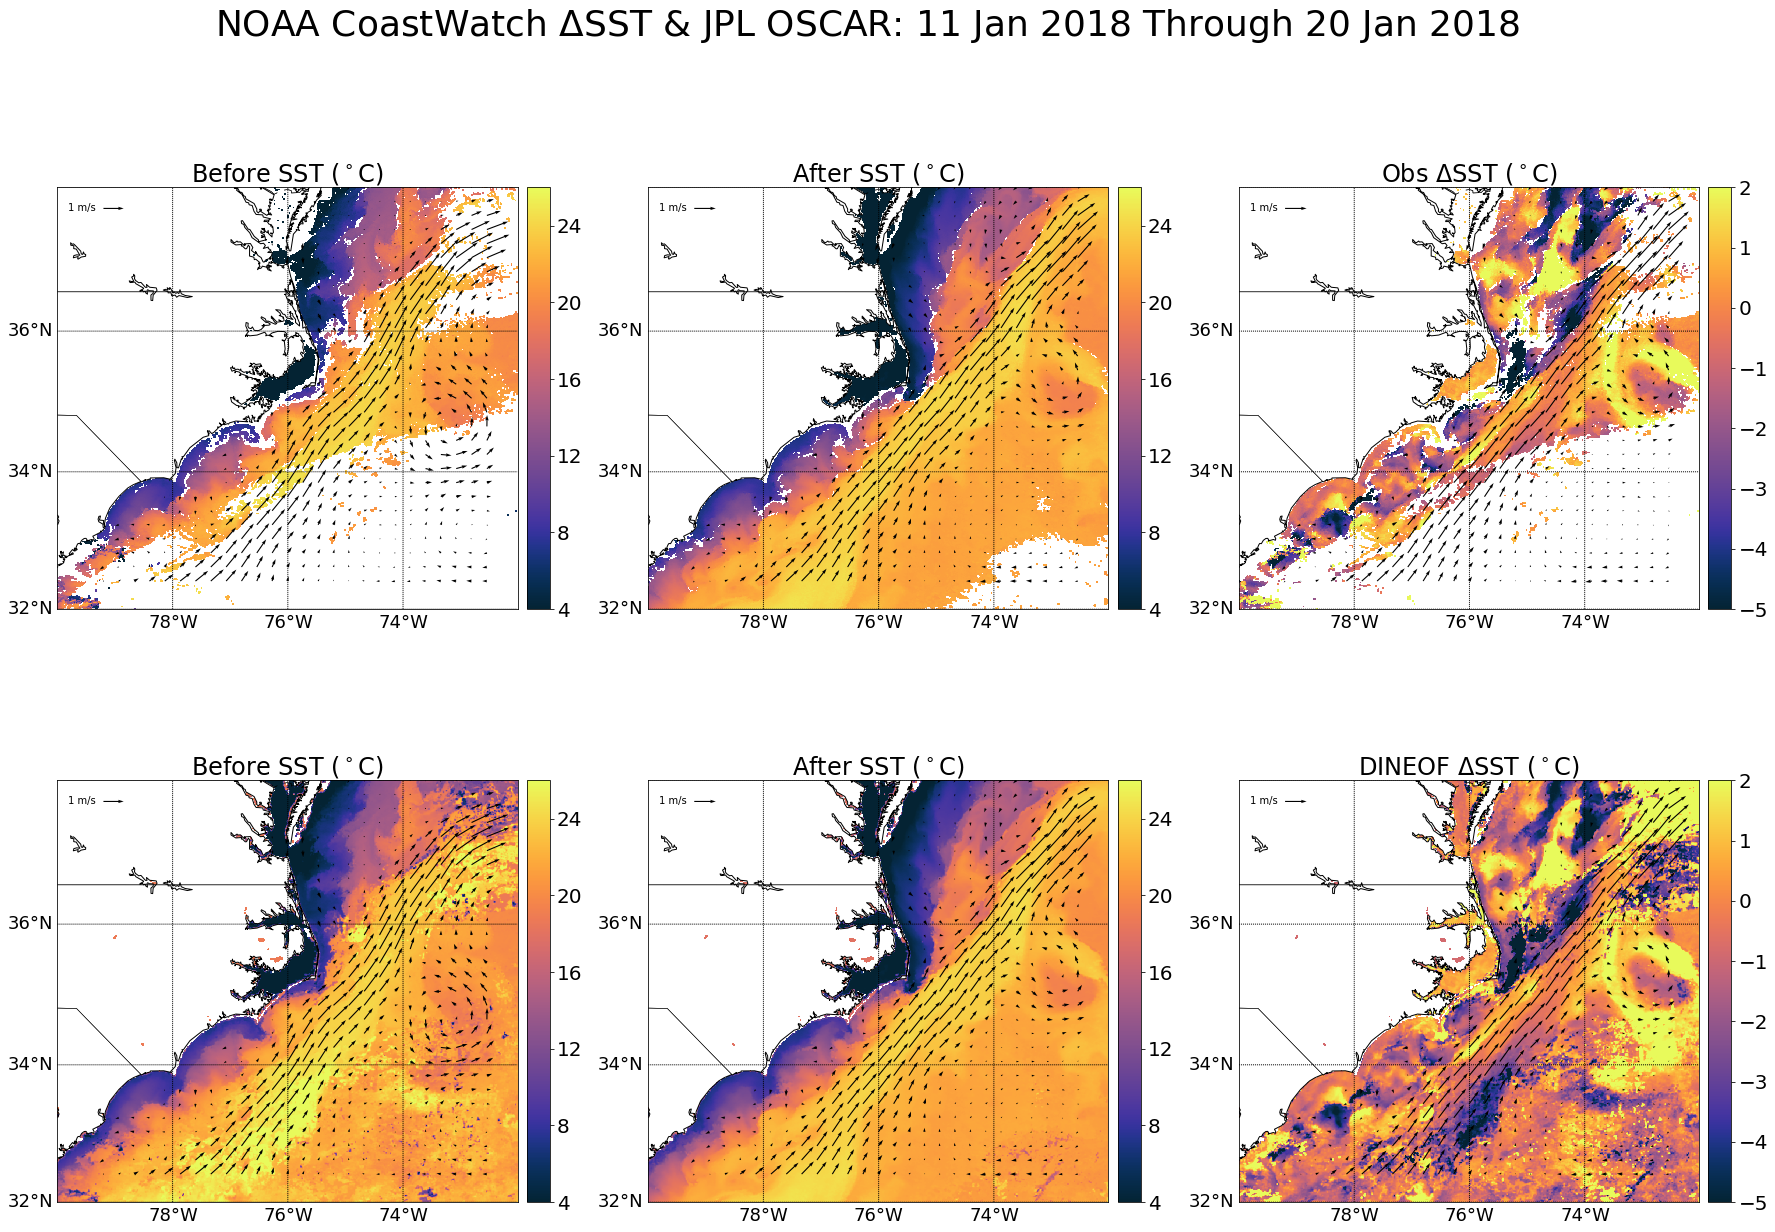

In [25]:
fig, ax = plt.subplots(2,3,figsize=(30,20))

parallels = np.arange(-90,90,2.)
meridians = np.arange(-180,180,2.)

plt.clf()
plt.suptitle('NOAA CoastWatch $\Delta$SST & JPL OSCAR: ' + \
             datetime.datetime(yyyy1,mm1,dd1).strftime("%d %b %Y") + ' Through ' + \
             datetime.datetime(yyyy2,mm2,dd2).strftime("%d %b %Y"),fontsize=36,family='Helvetica')

plt.subplot(2,3,1)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst1.lat)-np.min(sst1.lat))/2),
      lon_0=((np.max(sst1.lon)-np.min(sst1.lon))/2),
      llcrnrlon=np.min(sst1.lon),llcrnrlat=np.min(sst1.lat),
      urcrnrlon=np.max(sst1.lon),urcrnrlat=np.max(sst1.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(sst1.lon,sst1.lat)
data = np.squeeze(sst1.sst)
data[data<-5]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=sst_range[0],vmax=sst_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u1.latitude)
oscar_map_lon = np.asarray(oscar_u1.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u1.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v1.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('Before SST ($^\circ$C)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(sst_range[0],sst_range[1]+1e-5,sst_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,2)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst2.lat)-np.min(sst2.lat))/2),
      lon_0=((np.max(sst2.lon)-np.min(sst2.lon))/2),
      llcrnrlon=np.min(sst2.lon),llcrnrlat=np.min(sst2.lat),
      urcrnrlon=np.max(sst2.lon),urcrnrlat=np.max(sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(sst2.lon,sst2.lat)
data = np.squeeze(sst2.sst)
data[data<-5]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=sst_range[0],vmax=sst_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('After SST ($^\circ$C)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(sst_range[0],sst_range[1]+1e-5,sst_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,3)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst2.lat)-np.min(sst2.lat))/2),
      lon_0=((np.max(sst2.lon)-np.min(sst2.lon))/2),
      llcrnrlon=np.min(sst2.lon),llcrnrlat=np.min(sst2.lat),
      urcrnrlon=np.max(sst2.lon),urcrnrlat=np.max(sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(sst2.lon,sst2.lat)
sst1d = np.squeeze(sst1.sst); sst2d = np.squeeze(sst2.sst); 
sst1d[sst1d<-5]=np.nan; sst1d= np.ma.array(sst1d,mask=np.isnan(sst1d))
sst2d[sst2d<-5]=np.nan; sst2d= np.ma.array(sst2d,mask=np.isnan(sst2d))
data = sst2d - sst1d
data[data<-100]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=dsst_range[0],vmax=dsst_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('Obs $\Delta$SST ($^\circ$C)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(dsst_range[0],dsst_range[1]+1e-5,dsst_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,4)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(df_sst1.lat)-np.min(df_sst1.lat))/2),
      lon_0=((np.max(df_sst1.lon)-np.min(df_sst1.lon))/2),
      llcrnrlon=np.min(df_sst1.lon),llcrnrlat=np.min(df_sst1.lat),
      urcrnrlon=np.max(df_sst1.lon),urcrnrlat=np.max(df_sst1.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(df_sst1.lon,df_sst1.lat)
data = np.squeeze(df_sst1.sst)
data[data<-5]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=sst_range[0],vmax=sst_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u1.latitude)
oscar_map_lon = np.asarray(oscar_u1.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u1.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v1.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('Before SST ($^\circ$C)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(sst_range[0],sst_range[1]+1e-5,sst_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,5)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(df_sst2.lat)-np.min(df_sst2.lat))/2),
      lon_0=((np.max(df_sst2.lon)-np.min(df_sst2.lon))/2),
      llcrnrlon=np.min(df_sst2.lon),llcrnrlat=np.min(df_sst2.lat),
      urcrnrlon=np.max(df_sst2.lon),urcrnrlat=np.max(df_sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(df_sst2.lon,df_sst2.lat)
data = np.squeeze(df_sst2.sst)
data[data<-5]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=sst_range[0],vmax=sst_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('After SST ($^\circ$C)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(sst_range[0],sst_range[1]+1e-5,sst_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,6)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(df_sst2.lat)-np.min(df_sst2.lat))/2),
      lon_0=((np.max(df_sst2.lon)-np.min(df_sst2.lon))/2),
      llcrnrlon=np.min(df_sst2.lon),llcrnrlat=np.min(df_sst2.lat),
      urcrnrlon=np.max(df_sst2.lon),urcrnrlat=np.max(df_sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(df_sst2.lon,df_sst2.lat)
df_sst1d = np.squeeze(df_sst1.sst); df_sst2d = np.squeeze(df_sst2.sst); 
df_sst1d[df_sst1d<-5]=np.nan; df_sst1d= np.ma.array(df_sst1d,mask=np.isnan(df_sst1d))
df_sst2d[df_sst2d<-5]=np.nan; df_sst2d= np.ma.array(df_sst2d,mask=np.isnan(df_sst2d))
data = df_sst2d - df_sst1d
data[data<-100]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=dsst_range[0],vmax=dsst_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('DINEOF $\Delta$SST ($^\circ$C)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(dsst_range[0],dsst_range[1]+1e-5,dsst_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

fig.savefig('delta_coastwatch_' + datetime.datetime(yyyy1,mm1,dd1).strftime("%d%b%Y") +\
            datetime.datetime(yyyy2,mm2,dd2).strftime("%d%b%Y"),dpi=50)

/home/jbzambon/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less
/home/jbzambon/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3122: RuntimeWarning: invalid value encountered in greater_equal
  farnorth = np.abs(lats+dlat) >= 90.0
/home/jbzambon/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less
/home/jbzambon/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in less
/home/jbzambon/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:113: RuntimeWarning: invalid value encountered in less
/home/jbzambon/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in less
/home/jbzambon/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in less
/home/jbzambon/anaconda3/lib/pyth

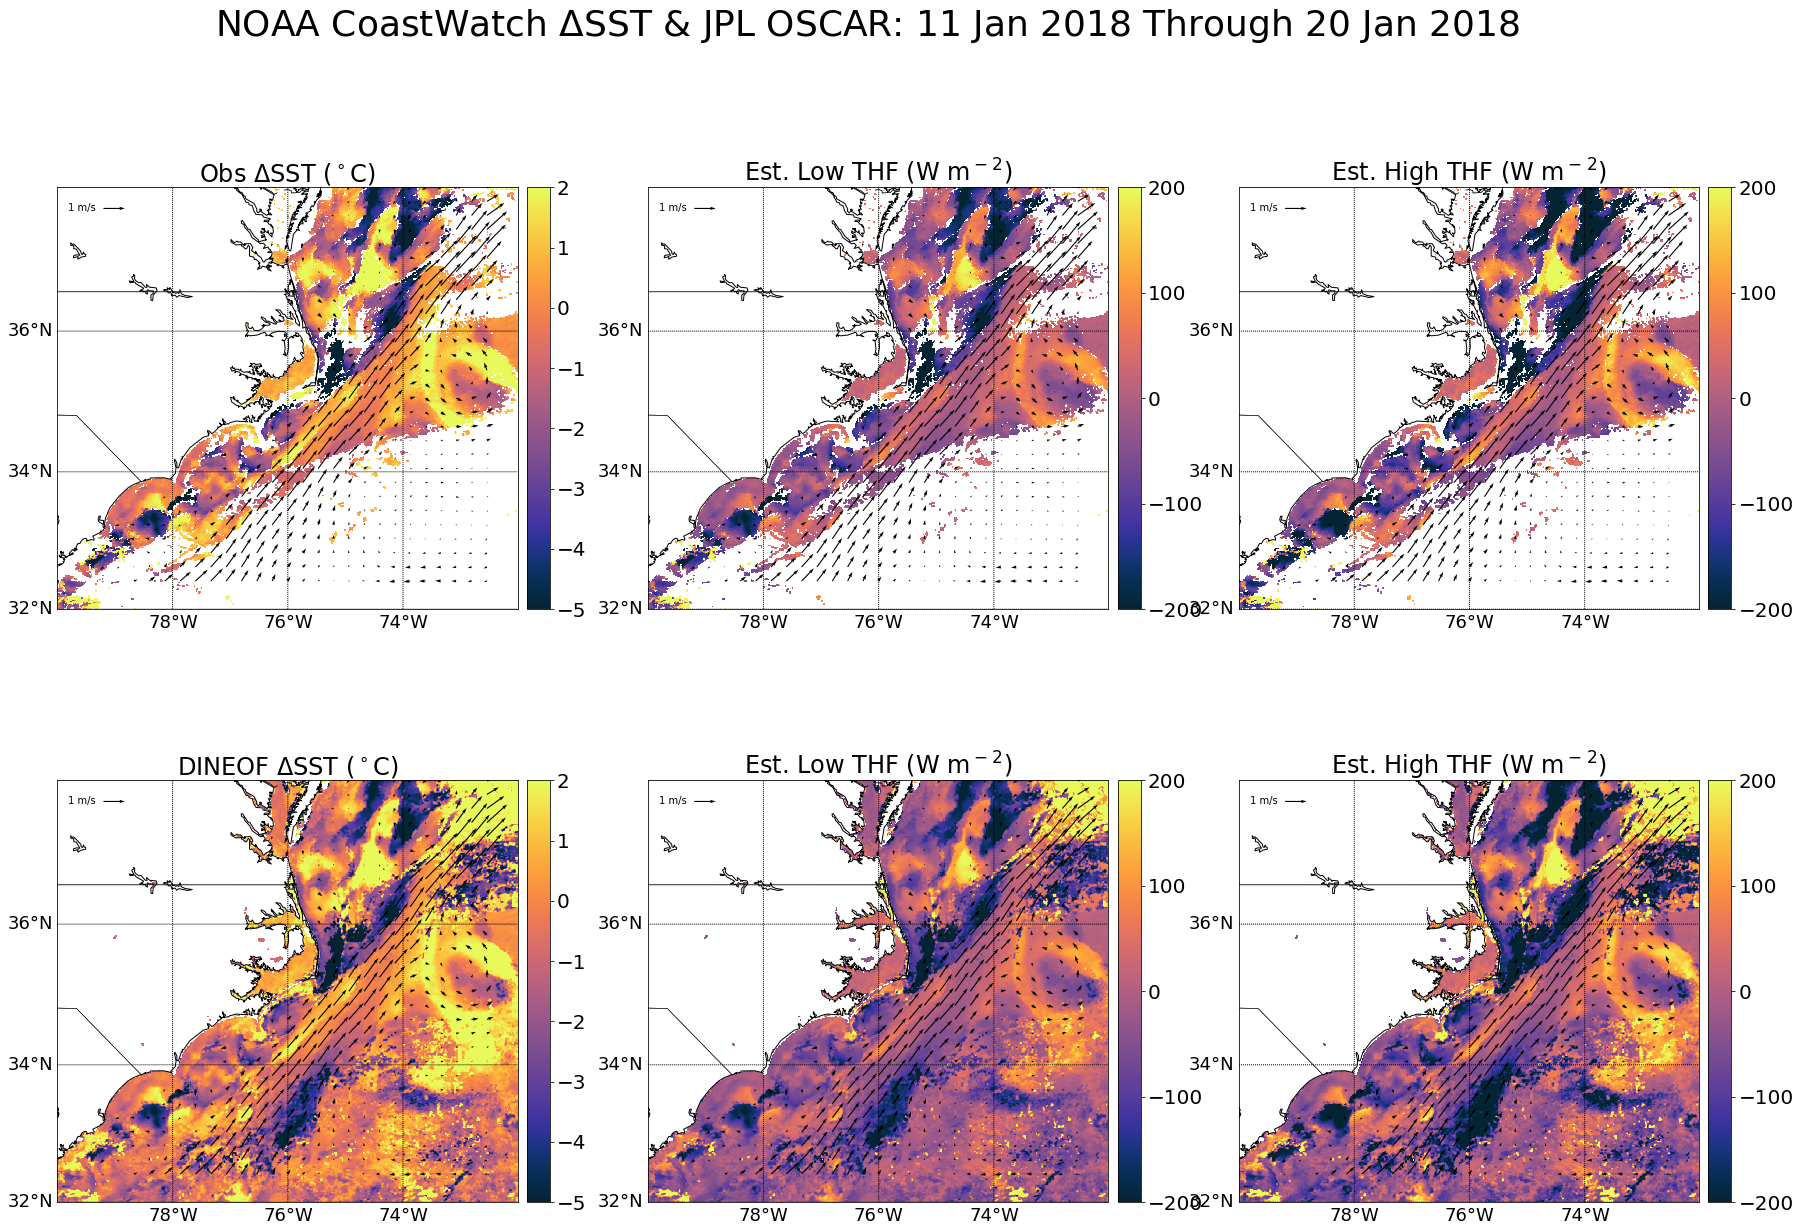

In [26]:
fig, ax = plt.subplots(2,3,figsize=(30,20))

parallels = np.arange(-90,90,2.)
meridians = np.arange(-180,180,2.)
sst_range = [4,26,4]   #min, max, colorbar step
dsst_range = [-5,2,1]   #min, max, colorbar step

plt.clf()
plt.suptitle('NOAA CoastWatch $\Delta$SST & JPL OSCAR: ' + \
             datetime.datetime(yyyy1,mm1,dd1).strftime("%d %b %Y") + ' Through ' + \
             datetime.datetime(yyyy2,mm2,dd2).strftime("%d %b %Y"),fontsize=36,family='Helvetica')

plt.subplot(2,3,1)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst2.lat)-np.min(sst2.lat))/2),
      lon_0=((np.max(sst2.lon)-np.min(sst2.lon))/2),
      llcrnrlon=np.min(sst2.lon),llcrnrlat=np.min(sst2.lat),
      urcrnrlon=np.max(sst2.lon),urcrnrlat=np.max(sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(sst2.lon,sst2.lat)
sst1d = np.squeeze(sst1.sst); sst2d = np.squeeze(sst2.sst); 
sst1d[sst1d<-5]=np.nan; sst1d= np.ma.array(sst1d,mask=np.isnan(sst1d))
sst2d[sst2d<-5]=np.nan; sst2d= np.ma.array(sst2d,mask=np.isnan(sst2d))
data = sst2d - sst1d
data[data<-100]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=dsst_range[0],vmax=dsst_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('Obs $\Delta$SST ($^\circ$C)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(dsst_range[0],dsst_range[1]+1e-5,dsst_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,2)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst2.lat)-np.min(sst2.lat))/2),
      lon_0=((np.max(sst2.lon)-np.min(sst2.lon))/2),
      llcrnrlon=np.min(sst2.lon),llcrnrlat=np.min(sst2.lat),
      urcrnrlon=np.max(sst2.lon),urcrnrlat=np.max(sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(sst2.lon,sst2.lat)
sst1d = np.squeeze(sst1.sst); sst2d = np.squeeze(sst2.sst); 
sst1d[sst1d<-5]=np.nan; sst1d= np.ma.array(sst1d,mask=np.isnan(sst1d))
sst2d[sst2d<-5]=np.nan; sst2d= np.ma.array(sst2d,mask=np.isnan(sst2d))
data = (sst2d - sst1d) * anomaly[0]
data[data<-1000]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=anomaly_range[0],vmax=anomaly_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('Est. Low THF (W m$^-$$^2$)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(anomaly_range[0],anomaly_range[1]+1e-5,anomaly_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,3)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst2.lat)-np.min(sst2.lat))/2),
      lon_0=((np.max(sst2.lon)-np.min(sst2.lon))/2),
      llcrnrlon=np.min(sst2.lon),llcrnrlat=np.min(sst2.lat),
      urcrnrlon=np.max(sst2.lon),urcrnrlat=np.max(sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(sst2.lon,sst2.lat)
sst1d = np.squeeze(sst1.sst); sst2d = np.squeeze(sst2.sst); 
sst1d[sst1d<-5]=np.nan; sst1d= np.ma.array(sst1d,mask=np.isnan(sst1d))
sst2d[sst2d<-5]=np.nan; sst2d= np.ma.array(sst2d,mask=np.isnan(sst2d))
data = (sst2d - sst1d) * anomaly[1]
data[data<-1000]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=anomaly_range[0],vmax=anomaly_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('Est. High THF (W m$^-$$^2$)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(anomaly_range[0],anomaly_range[1]+1e-5,anomaly_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,4)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst2.lat)-np.min(sst2.lat))/2),
      lon_0=((np.max(sst2.lon)-np.min(sst2.lon))/2),
      llcrnrlon=np.min(sst2.lon),llcrnrlat=np.min(sst2.lat),
      urcrnrlon=np.max(sst2.lon),urcrnrlat=np.max(sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(df_sst2.lon,df_sst2.lat)
df_sst1d = np.squeeze(df_sst1.sst); sst2d = np.squeeze(df_sst2.sst); 
df_sst1d[df_sst1d<-5]=np.nan; df_sst1d= np.ma.array(df_sst1d,mask=np.isnan(df_sst1d))
df_sst2d[df_sst2d<-5]=np.nan; df_sst2d= np.ma.array(df_sst2d,mask=np.isnan(df_sst2d))
data = df_sst2d - df_sst1d
data[data<-100]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=dsst_range[0],vmax=dsst_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('DINEOF $\Delta$SST ($^\circ$C)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(dsst_range[0],dsst_range[1]+1e-5,dsst_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')


plt.subplot(2,3,5)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst2.lat)-np.min(sst2.lat))/2),
      lon_0=((np.max(sst2.lon)-np.min(sst2.lon))/2),
      llcrnrlon=np.min(sst2.lon),llcrnrlat=np.min(sst2.lat),
      urcrnrlon=np.max(sst2.lon),urcrnrlat=np.max(sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(df_sst2.lon,df_sst2.lat)
df_sst1d = np.squeeze(df_sst1.sst); sst2d = np.squeeze(df_sst2.sst); 
df_sst1d[df_sst1d<-5]=np.nan; df_sst1d= np.ma.array(df_sst1d,mask=np.isnan(df_sst1d))
df_sst2d[df_sst2d<-5]=np.nan; df_sst2d= np.ma.array(df_sst2d,mask=np.isnan(df_sst2d))
data = (df_sst2d - df_sst1d) * anomaly[0]
data[data<-1000]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=anomaly_range[0],vmax=anomaly_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('Est. Low THF (W m$^-$$^2$)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(anomaly_range[0],anomaly_range[1]+1e-5,anomaly_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

plt.subplot(2,3,6)
map = Basemap(projection='merc',
      resolution='i',lat_0=((np.max(sst2.lat)-np.min(sst2.lat))/2),
      lon_0=((np.max(sst2.lon)-np.min(sst2.lon))/2),
      llcrnrlon=np.min(sst2.lon),llcrnrlat=np.min(sst2.lat),
      urcrnrlon=np.max(sst2.lon),urcrnrlat=np.max(sst2.lat))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
[X,Y] = np.meshgrid(df_sst2.lon,df_sst2.lat)
df_sst1d = np.squeeze(df_sst1.sst); sst2d = np.squeeze(df_sst2.sst); 
df_sst1d[df_sst1d<-5]=np.nan; df_sst1d= np.ma.array(df_sst1d,mask=np.isnan(df_sst1d))
df_sst2d[df_sst2d<-5]=np.nan; df_sst2d= np.ma.array(df_sst2d,mask=np.isnan(df_sst2d))
data = (df_sst2d - df_sst1d) * anomaly[1]
data[data<-1000]=np.nan; data= np.ma.array(data,mask=np.isnan(data))
map.pcolormesh(X,Y,data,cmap=cmocean.cm.thermal,vmin=anomaly_range[0],vmax=anomaly_range[1],latlon='true')
# Fix OSCAR data for map
oscar_map_lat = np.asarray(oscar_u2.latitude)
oscar_map_lon = np.asarray(oscar_u2.longitude)-360.
oscar_map_u = np.squeeze(np.asarray(oscar_u2.u))
oscar_map_v = np.squeeze(np.asarray(oscar_v2.v))
uproj,vproj,xx,yy = map.transform_vector(np.flipud(oscar_map_u),np.flipud(oscar_map_v),oscar_map_lon,np.flipud(oscar_map_lat),31,31,returnxy=True,masked=True)
Q=map.quiver(xx,yy,uproj,vproj)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=18)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18)
plt.title(('Est. High THF (W m$^-$$^2$)'),fontsize=24,family='Helvetica')
cbar=map.colorbar(location='right',ticks=np.arange(anomaly_range[0],anomaly_range[1]+1e-5,anomaly_range[2]))
cbar.ax.tick_params(labelsize=20)
qk=plt.quiverkey(Q, 0.1, 0.95, 1, '1 m/s', labelpos='W')

fig.savefig('thf_coastwatch_' + datetime.datetime(yyyy1,mm1,dd1).strftime("%d%b%Y") +\
            datetime.datetime(yyyy2,mm2,dd2).strftime("%d%b%Y"),dpi=50)